# Assignment 2

Abdurrahmaan Desai

#### Import packages

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn import tree
import graphviz

#### Read the main csv file

Reading in the csv file that has the all the data from 1995. Only the columns that are necessary are read in.

In [2]:
initial_df = pd.read_csv("pp-complete.csv",
                 usecols=[1, 2, 3, 9, 10, 11, 12, 13],
                 names=["price", "date of transfer", "postcode", "street", "locality", "town/city", "district", "county"])
print(initial_df)

           price  date of transfer  postcode                street  \
0          42000  1995-12-21 00:00   NE4 9DN          MATFEN PLACE   
1          95000  1995-03-03 00:00  RM16 4UR            HEATH ROAD   
2          74950  1995-10-03 00:00  CW10 9ES      SHROPSHIRE CLOSE   
3          43500  1995-11-14 00:00  TS23 3LA        SLEDMERE CLOSE   
4          63000  1995-09-08 00:00  CA25 5QH       CROSSINGS CLOSE   
...          ...               ...       ...                   ...   
27910949  655995  2022-02-21 00:00  LS29 6GL          PLOVER FIELD   
27910950  349950  2022-02-25 00:00   WF1 4FZ    BLACKWELL CRESCENT   
27910951  245000  2022-07-14 00:00  LS14 6ZF        BLENCARN DRIVE   
27910952  419950  2022-01-28 00:00   WF1 4FZ    BLACKWELL CRESCENT   
27910953  239995  2022-03-11 00:00   WF1 5FH  LITTLE WOOD CRESCENT   

              locality            town/city             district  \
0               FENHAM  NEWCASTLE UPON TYNE  NEWCASTLE UPON TYNE   
1                GRAYS 

#### Create the function to explore the dataset

This function does a few things:
- Prints out the first 5 rows of the dataframe
- Gives information about the dataframe such as the number of rows, the columns in the dataset and their respective datatypes and the size of the dataset
- Gives the dataframe shape
- Gives some mathematical information of the price (mean, standard deviation and quartiles etc)
- Creates a mask of all the null values and prints out the rows that have null values

In [3]:
def explore_dataset(dataframe):
    print(dataframe.head(), "\n")
    print(dataframe.info(), "\n")
    print("Dataframe shape ", dataframe.shape, "\n")
    print(dataframe.describe(), "\n")

    null_values = dataframe.isnull().any(axis=1)
    print(null_values)

#### Run the explore_dataset function

The results tell us that the dataset is quite large - nearly 28 million rows of data. Additionally, there are numerous null values present.

In [4]:
explore_dataset(initial_df)

   price  date of transfer  postcode            street      locality  \
0  42000  1995-12-21 00:00   NE4 9DN      MATFEN PLACE        FENHAM   
1  95000  1995-03-03 00:00  RM16 4UR        HEATH ROAD         GRAYS   
2  74950  1995-10-03 00:00  CW10 9ES  SHROPSHIRE CLOSE    MIDDLEWICH   
3  43500  1995-11-14 00:00  TS23 3LA    SLEDMERE CLOSE    BILLINGHAM   
4  63000  1995-09-08 00:00  CA25 5QH   CROSSINGS CLOSE  CLEATOR MOOR   

             town/city             district            county  
0  NEWCASTLE UPON TYNE  NEWCASTLE UPON TYNE     TYNE AND WEAR  
1                GRAYS             THURROCK          THURROCK  
2           MIDDLEWICH            CONGLETON          CHESHIRE  
3           BILLINGHAM     STOCKTON-ON-TEES  STOCKTON-ON-TEES  
4         CLEATOR MOOR             COPELAND           CUMBRIA   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27910954 entries, 0 to 27910953
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   pr

In [5]:
for col in initial_df:
    print(f'null values in {col}: {initial_df[col].isna().sum()}')

null values in price: 0
null values in date of transfer: 0
null values in postcode: 45287
null values in street: 441166
null values in locality: 9859105
null values in town/city: 0
null values in district: 0
null values in county: 0


#### Read the postcode dataset and explore it

This dataset will be used in conjunction with the initial dataset to plot a scatter graph showing the prices of houses in relation to the location. More information is given in the later on

In [6]:
postcodes_df = pd.read_csv("ukpostcodes.csv", usecols=[1, 2, 3])

explore_dataset(postcodes_df)


   postcode   latitude  longitude
0  AB10 1XG  57.144156  -2.114864
1  AB10 6RN  57.137871  -2.121487
2  AB10 7JB  57.124274  -2.127206
3  AB11 5QN  57.142701  -2.093295
4  AB11 6UL  57.137468  -2.112455 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791072 entries, 0 to 1791071
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   postcode   object 
 1   latitude   float64
 2   longitude  float64
dtypes: float64(2), object(1)
memory usage: 41.0+ MB
None 

Dataframe shape  (1791072, 3) 

           latitude     longitude
count  1.778538e+06  1.778538e+06
mean   5.275904e+01 -1.735303e+00
std    1.597529e+00  1.656105e+00
min    4.989517e+01 -8.163139e+00
25%    5.150420e+01 -2.731779e+00
50%    5.246013e+01 -1.595251e+00
75%    5.365072e+01 -3.824252e-01
max    1.000000e+02  1.762773e+00 

0          False
1          False
2          False
3          False
4          False
           ...  
1791067    False
1791068    False
1791069    False
1791070  

#### Merge the two dataframes together

This neat little function merges both the two dataframe on the postcode column. This is necessary to ensure that the correct longitude and latitude is applied to the correct house.

In [7]:
final_df = initial_df.merge(postcodes_df, on='postcode')
final_df.head()

,price,date of transfer,postcode,street,locality,town/city,district,county,latitude,longitude
0,42000,1995-12-21 00:00,NE4 9DN,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,54.982775,-1.648988
1,50000,1995-06-30 00:00,NE4 9DN,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,54.982775,-1.648988
2,54000,1996-07-19 00:00,NE4 9DN,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,54.982775,-1.648988
3,54000,1997-11-28 00:00,NE4 9DN,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,54.982775,-1.648988
4,49000,1998-08-27 00:00,NE4 9DN,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,54.982775,-1.648988


In [8]:
explore_dataset(final_df)

   price  date of transfer postcode        street locality  \
0  42000  1995-12-21 00:00  NE4 9DN  MATFEN PLACE   FENHAM   
1  50000  1995-06-30 00:00  NE4 9DN  MATFEN PLACE   FENHAM   
2  54000  1996-07-19 00:00  NE4 9DN  MATFEN PLACE   FENHAM   
3  54000  1997-11-28 00:00  NE4 9DN  MATFEN PLACE   FENHAM   
4  49000  1998-08-27 00:00  NE4 9DN  MATFEN PLACE   FENHAM   

             town/city             district         county   latitude  \
0  NEWCASTLE UPON TYNE  NEWCASTLE UPON TYNE  TYNE AND WEAR  54.982775   
1  NEWCASTLE UPON TYNE  NEWCASTLE UPON TYNE  TYNE AND WEAR  54.982775   
2  NEWCASTLE UPON TYNE  NEWCASTLE UPON TYNE  TYNE AND WEAR  54.982775   
3  NEWCASTLE UPON TYNE  NEWCASTLE UPON TYNE  TYNE AND WEAR  54.982775   
4  NEWCASTLE UPON TYNE  NEWCASTLE UPON TYNE  TYNE AND WEAR  54.982775   

   longitude  
0  -1.648988  
1  -1.648988  
2  -1.648988  
3  -1.648988  
4  -1.648988   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27815942 entries, 0 to 27815941
Data columns (

#### Create subset dataframes

As there are 27 years worth of data, it can become too much to visualise. Instead, I will take the data in 5 year intervals.

In [9]:
date_of_transfer = final_df['date of transfer'].tolist()
years = [x.split('-')[0] for x in date_of_transfer]
final_df['year'] = years

In [10]:
subset_df_1995 = final_df[final_df["year"] == "1995"]
subset_df_2000 = final_df[final_df["year"] == "2000"]
subset_df_2005 = final_df[final_df["year"] == "2005"]
subset_df_2010 = final_df[final_df["year"] == "2010"]
subset_df_2015 = final_df[final_df["year"] == "2015"]
subset_df_2022 = final_df[final_df["year"] == "2022"]

#### Create box plots for each subset

Box plots show the key features of the data set. It can be used to find the minimum and maximum, the median value as well as the lower and upper quartiles. These boxplots are very interesting to see as it shows how the value of houses has changed over the years. For instance, in 1995, the most expensive house was just over £400,000 with the majority of houses being between £30,000-£75,000. Contrast that to 2022 where the most expensive house sold was £7 million and the majority of houses were sold between £100,000 - £300,000.

It is important to note that the box plots show a sample of 1000 values from the dataset thus the plots may look different. However, the sample size allows us to gain a good idea of the general features of the dataset and allows us to compare and contrast between the years

<AxesSubplot:xlabel='price'>

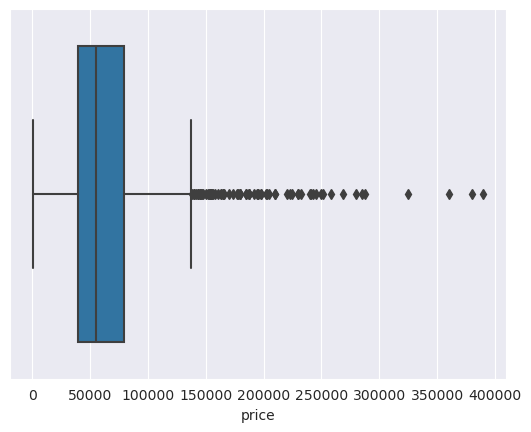

In [11]:
sns.boxplot(x=subset_df_1995["price"].sample(n=1000))

<AxesSubplot:xlabel='price'>

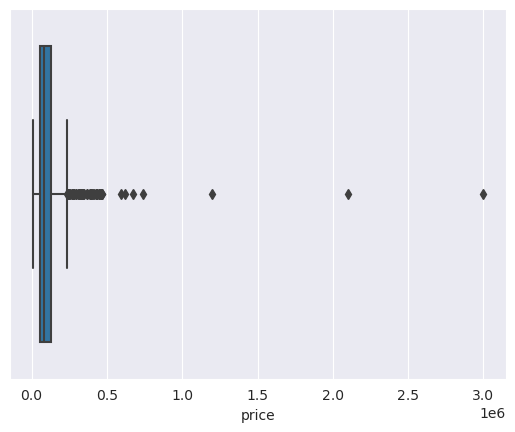

In [12]:
sns.boxplot(x=subset_df_2000["price"].sample(n=1000))

<AxesSubplot:xlabel='price'>

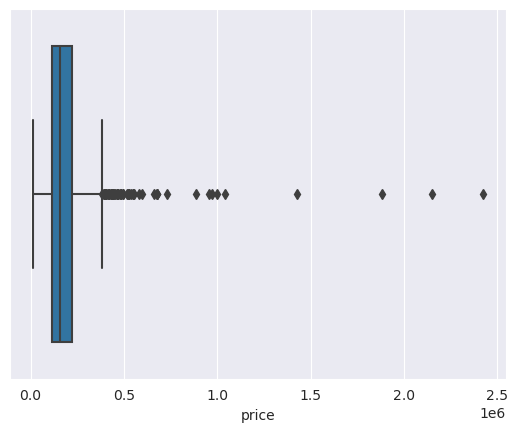

In [13]:
sns.boxplot(x=subset_df_2005["price"].sample(n=1000))

<AxesSubplot:xlabel='price'>

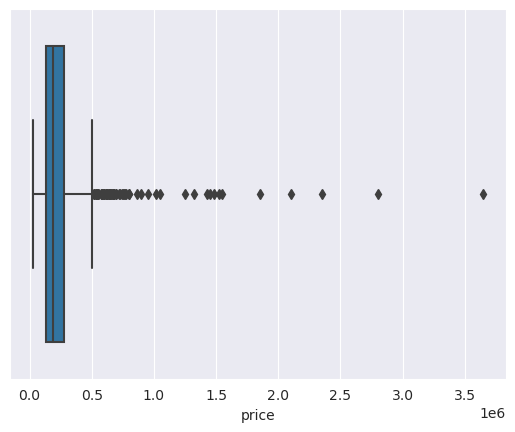

In [14]:
sns.boxplot(x=subset_df_2010["price"].sample(n=1000))

<AxesSubplot:xlabel='price'>

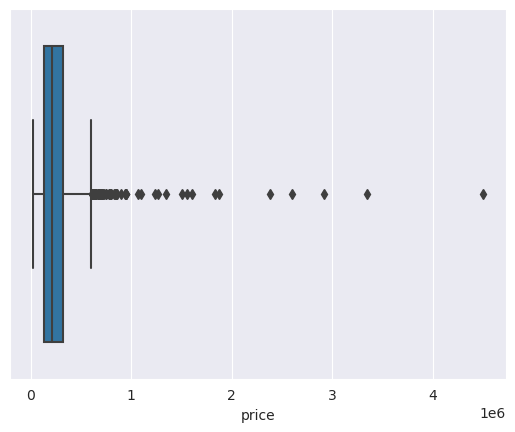

In [15]:
sns.boxplot(x=subset_df_2015["price"].sample(n=1000))

<AxesSubplot:xlabel='price'>

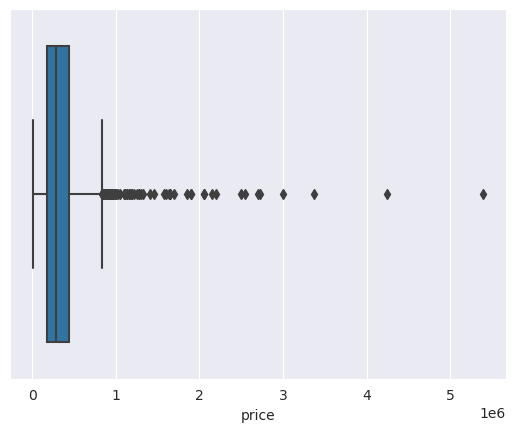

In [16]:
sns.boxplot(x=subset_df_2022["price"].sample(n=1000))

#### Create the function to visualise the prices in relation to the location

The function below allows us to plot the prices that have been paid in relation to the location. Earlier on, we merged the postcode dataframe with the prices paid dataframe on the postcodes. What this means is that the row of data that has the details of a specific transaction has the addition of two more columns which hold the latitude and longitude of the postcode of the house. The postcode was used to combine the two dataframes as the value the merge occurs on must be in both dataframes so that they merge together correctly.

A scatter graph is simply a graph that uses dots to represent two different values. Using the latitude and longitude as these values gives us a scatter graph that forms the shape of England and Wales.

These graphs show an interesting gradual increase of house prices initially stemming from the London area. In 1995, the higher prices are definitely concentrated in the London area, however as the years go on the higher prices appear in more and more areas around England and Wales. In 2022, the large majority of the south of England are in the upper levels of prices.

The prices on the graphs are all between £200k and £1 million to ensure that there is consistency over all of the graphs.

In [17]:
def plot_prices(df):
    # Prices sorted
    df_sorted = df.sort_values(by='price')
    plt.scatter(df_sorted['longitude'], df_sorted['latitude'], s=0.01, c=df_sorted['price'], cmap='cool',
                norm=colors.Normalize(200_000, 1_000_000))

    plt.colorbar()

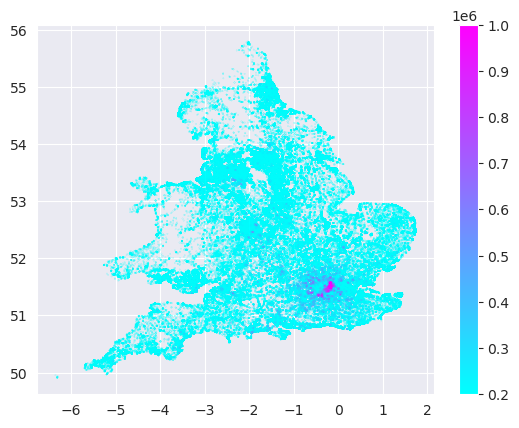

In [18]:
plot_prices(subset_df_1995)

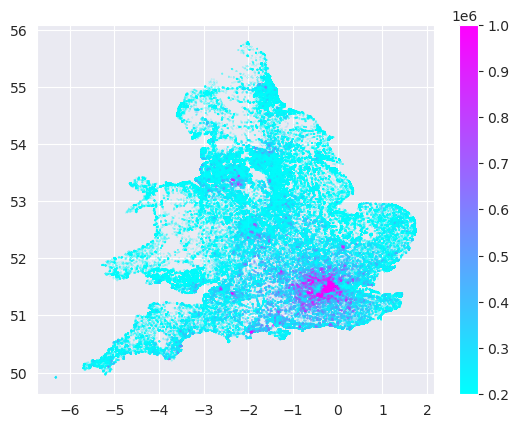

In [19]:
plot_prices(subset_df_2000)

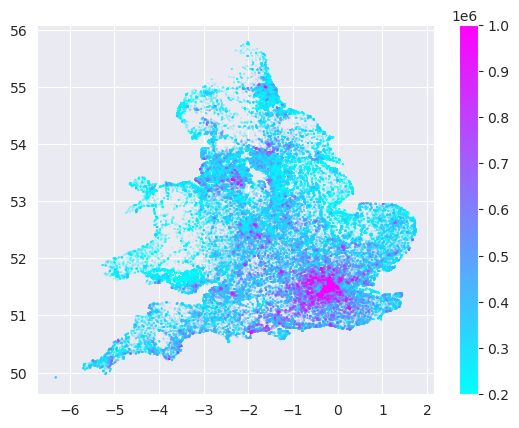

In [20]:
plot_prices(subset_df_2005)

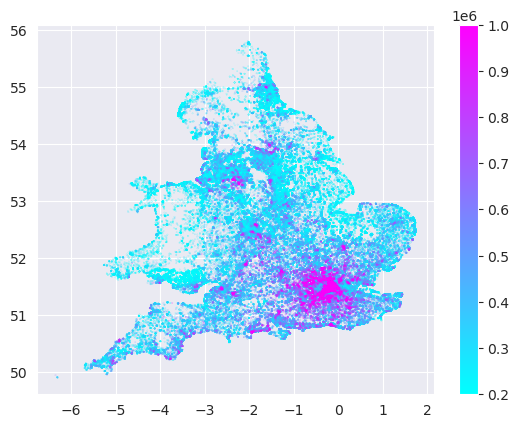

In [21]:
plot_prices(subset_df_2010)

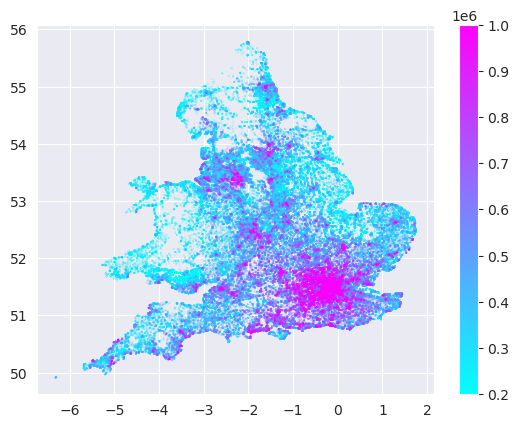

In [22]:
plot_prices(subset_df_2015)

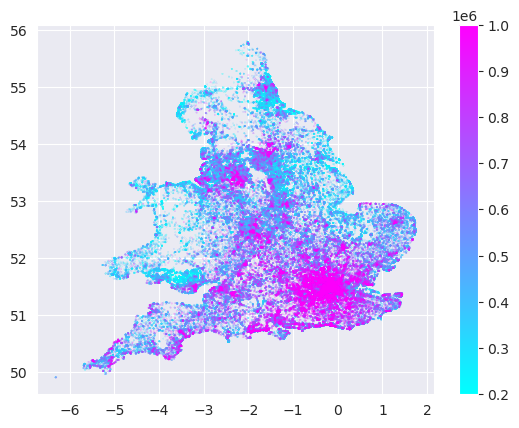

In [23]:
plot_prices(subset_df_2022)

#### Start the machine learning process

The main csv to use in the model is read in and merged with the post code databases as we will use the latitude and longitude as the model features. More of this will be explained in the main training function

In [24]:
singular_2022_df = pd.read_csv("pp-2022.csv",
                               usecols=[1,3,4,5,11,13],
                               names=["price","postcode","type","new","city","county"])


In [25]:
singular_2022_df = singular_2022_df.merge(postcodes_df,on='postcode')
singular_2022_df.head()

,price,postcode,type,new,city,county,latitude,longitude
0,80000,L31 5JY,S,N,LIVERPOOL,MERSEYSIDE,53.497375,-2.944251
1,215000,CH46 0TP,S,N,WIRRAL,MERSEYSIDE,53.395955,-3.107283
2,220000,CH46 0TP,S,N,WIRRAL,MERSEYSIDE,53.395955,-3.107283
3,178000,CH46 0TP,S,N,WIRRAL,MERSEYSIDE,53.395955,-3.107283
4,250000,CH46 0TP,S,N,WIRRAL,MERSEYSIDE,53.395955,-3.107283


In [26]:
explore_dataset(singular_2022_df)

    price  postcode type new       city      county   latitude  longitude
0   80000   L31 5JY    S   N  LIVERPOOL  MERSEYSIDE  53.497375  -2.944251
1  215000  CH46 0TP    S   N     WIRRAL  MERSEYSIDE  53.395955  -3.107283
2  220000  CH46 0TP    S   N     WIRRAL  MERSEYSIDE  53.395955  -3.107283
3  178000  CH46 0TP    S   N     WIRRAL  MERSEYSIDE  53.395955  -3.107283
4  250000  CH46 0TP    S   N     WIRRAL  MERSEYSIDE  53.395955  -3.107283 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809990 entries, 0 to 809989
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   price      809990 non-null  int64  
 1   postcode   809990 non-null  object 
 2   type       809990 non-null  object 
 3   new        809990 non-null  object 
 4   city       809990 non-null  object 
 5   county     809990 non-null  object 
 6   latitude   809990 non-null  float64
 7   longitude  809990 non-null  float64
dtypes: float64(2), int64(1), obje

In [27]:
for col in singular_2022_df:
    print(f'null values in {col}: {singular_2022_df[col].isna().sum()}')

null values in price: 0
null values in postcode: 0
null values in type: 0
null values in new: 0
null values in city: 0
null values in county: 0
null values in latitude: 0
null values in longitude: 0


#### Create functions to train the models

- filter_house_type() is responsible for filtering the dataframe to only rows of data that have a specific type of house
- group_on_location() is responsible for grouping data and calculating the mean for a specific area - eg using a value of city will group all the houses in a city together
- train_model_house_type_location() is the main logic to training a model

In [28]:
def filter_house_type(df, house_type):
    return_df = df[(df['type'] == house_type)]
    return return_df

In [29]:
def group_on_location(df, location_type):
    return_df = df.groupby([location_type,"latitude","longitude"], as_index=False)["price"].mean()
    return return_df

#### Understanding the training function

This function is created to be as flexible as possible. It requires the dataframe as a parameter but also allows the caller to specify a type of house or a type of location to narrow the dataset down.

If the caller sends the optional parameters, a check is made to ensure that the values are correct and will notify the user and stop running if not correct.

If valid optional parameters are sent, the dataframe will be filtered down.

The features and labels will then be extracted. In this function, the combination of the latitude and longitude is used as the feature. The model type that is being used is the KNeighborsRegressor which necessitates a continuous variable. Thus, a city or county would not work as they are discrete. The label will be the price.

The features and labels are then split into train and test sets.

As part of the flexibility of the function, it allows the type of model algorithm to be specified. There are 3 types of models, k-NN (KNeighborsRegressor()), RNC (RadiusNeighborsRegressor()), RFR (RandomForestRegressor()).







The model is then created. As k-NN is being used, GridSearchCV() is used to iterate through a number of neighbors (in this case from 1 to 50). Once all the iterations are complete, the most accurate model will be returned.

The score is then printed out.


In [30]:
def train_model_house_type_location(df, house_type = "", location_type = "", model_to_use = "k-NN", min_val=0, max_val=0):
    
    dataframe_to_use = df

    valid_house_types = ["D", "S", "T", "F"]
    valid_location_types = ["city", "county", "postcode"]
    valid_model_types = ["k-NN", "RNC", "RFR"]

    if (house_type and house_type not in valid_house_types)\
            or location_type and location_type not in valid_location_types \
            or (model_to_use not in valid_model_types)\
            or not min_val and max_val\
            or min_val and not max_val:
        if house_type and house_type not in valid_house_types:
            print(f'{house_type} does not exist')
            print(f'Valid house types are: {valid_house_types}')
        if location_type and location_type not in valid_location_types:
            print(f'{location_type} does not exist')
            print(f'Valid location types are: {valid_location_types}')
        if model_to_use not in valid_model_types:
            print(f'{model_to_use} does not exist')
            print(f'Valid model types are: {valid_model_types}')
        if not min_val and max_val or min_val and not max_val:
            print("Please enter a non-zero value for both min_val and max_val")
    else:
        if house_type:
            dataframe_to_use = filter_house_type(dataframe_to_use, house_type)

        if location_type:
            dataframe_to_use = group_on_location(dataframe_to_use, location_type)

        if min_val and max_val:
            dataframe_to_use = dataframe_to_use[dataframe_to_use['price'] >= min_val]
            dataframe_to_use = dataframe_to_use[dataframe_to_use['price'] <= max_val]

        features = dataframe_to_use[['latitude','longitude']]
        labels = dataframe_to_use['price']

        X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

        feature_train_values = X_train.values
        label_train_values = y_train.values

        features_test_values = X_test.values
        label_test_values = y_test.values


        if model_to_use == "k-NN":
            params = {'n_neighbors':range(1,30),'weights':['uniform','distance']}
            model = GridSearchCV(KNeighborsRegressor(), params,  cv = 10)

        elif model_to_use == "RNC":
            params = {'weights':['uniform','distance']}
            model = GridSearchCV(RadiusNeighborsRegressor(0.8), params, cv = 10)
        else:
            params = {'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}
            model = GridSearchCV(RandomForestRegressor(random_state=0), params, cv=10, verbose=1)

        model.fit(feature_train_values, label_train_values)

        best_model = model.best_estimator_
        print(best_model)

        if house_type == "D":
            print_house_type = "Detached"
        elif house_type == "S":
            print_house_type = "Semi-detached"
        elif house_type == "T":
            print_house_type = "Terraced"
        elif house_type == "F":
            print_house_type = "Flats"
        else:
            print_house_type = "No specific house type"

        if not location_type:
            location_type = "No specific location type"

        pred = model.predict(features_test_values)

        score = model.score(features_test_values, label_test_values)

        print(f'{print_house_type} and {location_type} accuracy: {score}')
        print(f'\tAbsolute mean error: {mean_absolute_error(label_test_values, pred)}')
        print(f'\tMean squared error: {mean_squared_error(label_test_values, pred)}')
        print(f'\tMean absolute percentage error: {mean_absolute_percentage_error(label_test_values, pred)}\n')

        return model, score

In [31]:
# tree.plot_tree(best)
# dot_data = tree.export_graphviz(best, out_file=None, max_depth=3, class_names=['positive', 'negative'])
# graph = graphviz.Source(dot_data)
# graph.render("test")

In [46]:
valid_house_types = ["D", "S", "T", "F"]
valid_location_types = ["city", "county", "postcode"]
valid_model_types = ["k-NN", "RNC"]

In [ ]:
for model_val in valid_model_types:
    for house_val in valid_house_types:
        x = train_model_house_type_location(singular_2022_df, house_val, model_to_use = model_val, min_val =  100_000, max_val =  1_000_000)
    print()

KNeighborsRegressor(n_neighbors=20, weights='distance')
Detached and No specific location type accuracy: 0.5125636323447366
	Absolute mean error: 96561.41624447057
	Mean squared error: 17927728840.89689
	Mean absolute percentage error: 0.2321739535148221

KNeighborsRegressor(n_neighbors=19, weights='distance')
Semi-detached and No specific location type accuracy: 0.726217906430117
	Absolute mean error: 54876.98594528681
	Mean squared error: 7098081580.845599
	Mean absolute percentage error: 0.18640449233613426

KNeighborsRegressor(n_neighbors=21, weights='distance')
Terraced and No specific location type accuracy: 0.7594125415442747
	Absolute mean error: 49614.748284500536
	Mean squared error: 6459138773.181047
	Mean absolute percentage error: 0.1819337134543305

KNeighborsRegressor(n_neighbors=29, weights='distance')
Flats and No specific location type accuracy: 0.6817390809783235
	Absolute mean error: 60931.228199723475
	Mean squared error: 9430241269.638483
	Mean absolute percentage

In [ ]:
for model_val in valid_model_types:
    for location_val in valid_location_types:
        x = train_model_house_type_location(singular_2022_df, location_type = location_val,  model_to_use = model_val, min_val =  100_000, max_val =  1_000_000)
    print()

In [33]:
for house_val in valid_house_types:
    for location_val in valid_location_types:
        x = train_model_house_type_location(singular_2022_df, house_val, location_val, "k-NN", 100_000, 1_000_000)
    print()

KNeighborsRegressor(n_neighbors=21, weights='distance')
Detached and city accuracy: 0.4981693255723876
	Absolute mean error: 101744.41249832201
	Mean squared error: 19091224000.384304
	Mean absolute percentage error: 0.24300195770151248

KNeighborsRegressor(n_neighbors=20, weights='distance')
Detached and county accuracy: 0.4958951933831852
	Absolute mean error: 101133.15073802351
	Mean squared error: 18920548109.675793
	Mean absolute percentage error: 0.24382656087221857

KNeighborsRegressor(n_neighbors=20, weights='distance')
Detached and postcode accuracy: 0.5011894043985601
	Absolute mean error: 100679.95951898005
	Mean squared error: 18838403907.106228
	Mean absolute percentage error: 0.2433568674390625


KNeighborsRegressor(n_neighbors=16, weights='distance')
Semi-detached and city accuracy: 0.7133876708921161
	Absolute mean error: 56744.79973303985
	Mean squared error: 7481128639.740583
	Mean absolute percentage error: 0.19210846867729264

KNeighborsRegressor(n_neighbors=18, wei

In [34]:
for house_val in valid_house_types:
    for location_val in valid_location_types:
        x = train_model_house_type_location(singular_2022_df, house_val, location_val, "RNC", 100_000, 1_000_000)
    print()

RadiusNeighborsRegressor(radius=0.8, weights='distance')
Detached and city accuracy: 0.34978112705247055
	Absolute mean error: 121748.20550720215
	Mean squared error: 24736379789.612312
	Mean absolute percentage error: 0.304944638260191

RadiusNeighborsRegressor(radius=0.8, weights='distance')
Detached and county accuracy: 0.3459596830770709
	Absolute mean error: 121460.93761927476
	Mean squared error: 24548072384.11107
	Mean absolute percentage error: 0.3078354592429948

RadiusNeighborsRegressor(radius=0.8, weights='distance')
Detached and postcode accuracy: 0.35060698251769973
	Absolute mean error: 121266.49393506002
	Mean squared error: 24525397146.056038
	Mean absolute percentage error: 0.3085369435948089


RadiusNeighborsRegressor(radius=0.8, weights='distance')
Semi-detached and city accuracy: 0.56306082177441
	Absolute mean error: 74660.99386174534
	Mean squared error: 11404946222.036972
	Mean absolute percentage error: 0.2661732269231495

RadiusNeighborsRegressor(radius=0.8, we

In [ ]:
# Justification for commenting out:
# This model tends to take the longest but also performs the worst from my tests.


# for house_val in valid_house_types:
#     for location_val in valid_location_types:
#         x = train_model_house_type_location(singular_2022_df, house_val, location_val, "RFR", 100_000, 1_000_000)
#     print()

In [36]:
score_vals = []
min_max_list = []

for min_val in range(100_000, 3_000_000, 100_000):
    for max_val in range(min_val + 100_000, 3_000_000, 100_000):
        try:
            print(f'Running with {min_val} and {max_val}')
            model, score = train_model_house_type_location(singular_2022_df, "T", "city", "k-NN", min_val, max_val)
            score_vals.append(score)
            temp = (min_val, max_val)
            min_max_list.append(temp)
        except:
            print(f'{min_val} and {max_val} failed')

Running with 100000 and 200000
KNeighborsRegressor(n_neighbors=29, weights='distance')
Terraced and city accuracy: 0.2976962215091222
	Absolute mean error: 19351.83845524164
	Mean squared error: 580880018.2536491
	Mean absolute percentage error: 0.1348881417892162

Running with 100000 and 300000
KNeighborsRegressor(n_neighbors=29, weights='distance')
Terraced and city accuracy: 0.556301511683847
	Absolute mean error: 28828.77357882789
	Mean squared error: 1417209442.0360117
	Mean absolute percentage error: 0.16114727957829503

Running with 100000 and 400000
KNeighborsRegressor(n_neighbors=26, weights='distance')
Terraced and city accuracy: 0.6577337129674771
	Absolute mean error: 34982.63086876732
	Mean squared error: 2268482249.406035
	Mean absolute percentage error: 0.16965857982165028

Running with 100000 and 500000
KNeighborsRegressor(n_neighbors=26, weights='distance')
Terraced and city accuracy: 0.6986026291297207
	Absolute mean error: 39745.546064192524
	Mean squared error: 3110

In [42]:
# Number of models created from the above cell
print(len(score_vals))

406


In [37]:
# Highest model accuracy
print(max(score_vals))

0.7902417991765678


In [38]:
# Index of highest accuracy model
print(score_vals.index(max(score_vals)))

19


In [39]:
# Min and max of highest accuracy model
print(min_max_list[19])

(100000, 2100000)


In [40]:
def test_model(model, long, lat):
    test_val = [[long, lat]]
    test_val = np.array(test_val)
    test_val = test_val.reshape(1,-1)
    print(model.predict(test_val))

In [41]:
# Test the most accurate model
t_city_model_knn, score = train_model_house_type_location(singular_2022_df, "T", "city", "k-NN", 100_000, 2_100_000)
# UCLan
test_model(t_city_model_knn, 53.76321288277755, -2.7085861353776046)

# Liverpool city centre
test_model(t_city_model_knn, 53.4116561608456, -2.9883140338844947)

# Trafalgar Square
test_model(t_city_model_knn, 51.50740292676347, -0.12822135852661007)

KNeighborsRegressor(n_neighbors=17, weights='distance')
Terraced and city accuracy: 0.7902417991765678
	Absolute mean error: 59715.82929041101
	Mean squared error: 11312495711.514355
	Mean absolute percentage error: 0.1939718641966328

[128155.64836776]
[237742.409668]
[1459610.38759517]
